# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [2]:
import pandas as pd
df_airbnb = pd.read_csv("./src/airbnb.csv")

In [3]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [5]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [34]:
# Consejo: para mostrar 3 alternativas emplee head(3)
filtro=df_airbnb.loc[(df_airbnb['reviews']>10) & (df_airbnb['overall_satisfaction']>4)]
print(filtro)

        room_id    host_id        room_type       neighborhood  reviews  \
2         25659     107347  Entire home/apt  Santa Maria Maior       63   
3         29248     125768  Entire home/apt  Santa Maria Maior      225   
4         29396     126415  Entire home/apt  Santa Maria Maior      132   
5         29720     128075  Entire home/apt            Estrela       14   
6         29872     128698  Entire home/apt          Alcântara       25   
...         ...        ...              ...                ...      ...   
11986  18306197  126608804  Entire home/apt            Estrela       11   
11992  18309403   15826725  Entire home/apt  Santa Maria Maior       11   
11994  18311057  126613630     Private room  Santa Maria Maior       11   
12012  18322425  106306229     Private room    Penha de França       14   
12051  18355475   74171605  Entire home/apt       Misericórdia       14   

       overall_satisfaction  accommodates  bedrooms   price  
2                       5.0          

In [46]:
df_ordenado=filtro.sort_values(['reviews','overall_satisfaction'],ascending=False)
print(df_ordenado)

        room_id    host_id        room_type       neighborhood  reviews  \
120      176153     842219  Entire home/apt       Misericórdia      438   
1369    1745355    9186518  Entire home/apt            Olivais      419   
931     1085634    5968047  Entire home/apt       Misericórdia      379   
446      555172    2727077  Entire home/apt       Misericórdia      360   
233      317916    1631771     Private room            Estrela      344   
...         ...        ...              ...                ...      ...   
11586  17974974  123450353  Entire home/apt       Misericórdia       11   
11757  18127740   69562114  Entire home/apt              Ajuda       11   
11773  18138730  125042217  Entire home/apt  Santa Maria Maior       11   
11910  18260651   37385021  Entire home/apt              Belém       11   
11986  18306197  126608804  Entire home/apt            Estrela       11   

       overall_satisfaction  accommodates  bedrooms  price  
120                     5.0           

In [48]:
#RESULTADO FINAL
df_ordenado.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
120,176153,842219,Entire home/apt,Misericórdia,438,5.0,4,2.0,102.0
1369,1745355,9186518,Entire home/apt,Olivais,419,4.5,5,2.0,50.0
931,1085634,5968047,Entire home/apt,Misericórdia,379,5.0,2,1.0,52.0


### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [109]:
propietarios=[97503,90387]
df_propietarios = df_airbnb[df_airbnb['room_id'].isin(propietarios)]

In [110]:
df_propietarios

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
41,90387,490050,Private room,Santo António,204,5.0,2,1.0,46.0
48,97503,515924,Private room,Santo António,39,4.0,2,1.0,26.0


In [114]:
ruta_excel='./src/roberto.xlsx'
df_propietarios.to_excel(ruta_excel,index=False)


### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [13]:
filtro2 = df_airbnb[df_airbnb['room_type'] == 'Shared room']
filtro2 = filtro2.sort_values(by='overall_satisfaction', ascending=False)

In [14]:
filtro2.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
6399,11278059,58899339,Shared room,Arroios,27,5.0,9,1.0,22.0
9964,16150682,58899339,Shared room,Avenidas Novas,4,5.0,9,1.0,16.0
7313,12826411,6981742,Shared room,Alvalade,12,5.0,1,1.0,22.0
3727,5803348,29676067,Shared room,Misericórdia,19,5.0,9,1.0,20.0
3663,5725814,29676067,Shared room,Misericórdia,23,5.0,6,1.0,21.0
7932,13570032,78249982,Shared room,Misericórdia,8,5.0,10,1.0,48.0
7312,12826213,6981742,Shared room,Alvalade,19,5.0,1,1.0,22.0
4911,7722107,40574313,Shared room,Avenidas Novas,22,5.0,4,1.0,36.0
3139,4686135,24225052,Shared room,Areeiro,9,5.0,4,1.0,56.0
7066,12305540,66077974,Shared room,Arroios,40,5.0,1,1.0,13.0


## Usando MatPlot

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

### Caso 1.

Realizar un gráfico circular, de la cantidad de tipo de habitaciones `room_type`  

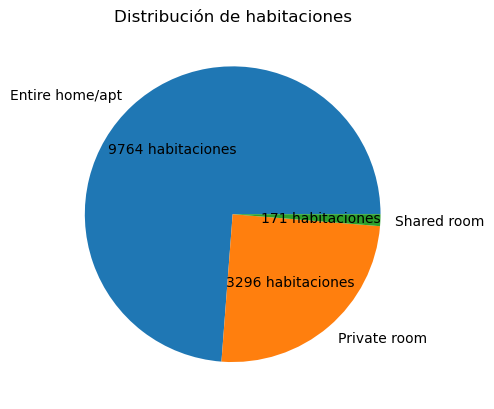

In [10]:
habitaciones = df_airbnb['room_type'].value_counts()
plt.pie(habitaciones, labels=habitaciones.index, autopct=lambda pct: f'{int(pct/100*len(df_airbnb))} habitaciones')
plt.title('Distribución de habitaciones')
plt.show()
